In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn. tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
df=pd.read_csv('newdata.csv')
df.shape
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14735 entries, 0 to 14734
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ATP                   14735 non-null  int64  
 1   Tournament            14735 non-null  object 
 2   Tournament_Int        14735 non-null  float64
 3   Date                  14735 non-null  int64  
 4   Series                14735 non-null  object 
 5   Series_Int            14735 non-null  float64
 6   Court                 14735 non-null  object 
 7   Court_Int             14735 non-null  float64
 8   Surface               14735 non-null  object 
 9   Surface_Int           14735 non-null  float64
 10  Round                 14735 non-null  object 
 11  Round_Int             14735 non-null  float64
 12  Best_of               14735 non-null  int64  
 13  Winner                14735 non-null  object 
 14  Winner_Int            14735 non-null  float64
 15  Player1            

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Player1,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
0,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,YmerE.,6.7633,ThompsonJ.,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752
1,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,MahutN.,6.9297,RobertS.,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115
2,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,TomicB.,6.5792,FerrerD.,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975
3,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,EdmundK.,6.8384,EscobedoE.,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322
4,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,JohnsonS.,6.7032,DimitrovG.,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092
5,1,BrisbaneInternational,1.2757,42738,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,DonaldsonJ.,6.9054,MullerG.,6.6176,105.0,34.0,2.64,1.47,0.3788,0.6803
6,1,BrisbaneInternational,1.2757,42738,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,HerbertP.H.,6.9637,GrothS.,6.9961,78.0,180.0,1.61,2.27,0.6211,0.4405
7,1,BrisbaneInternational,1.2757,42738,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,PouilleL.,6.8045,SimonG.,6.6845,15.0,25.0,1.83,1.94,0.5464,0.5155
8,1,BrisbaneInternational,1.2757,42738,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,NishiokaY.,6.8975,TroickiV.,6.8786,100.0,29.0,2.57,1.49,0.3891,0.6711
9,1,BrisbaneInternational,1.2757,42738,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,SchwartzmanD.,6.0786,QuerreyS.,6.4965,52.0,31.0,2.18,1.66,0.4587,0.6024


In [2]:
df.isnull().sum()

ATP                      0
Tournament               0
Tournament_Int           0
Date                     0
Series                   0
Series_Int               0
Court                    0
Court_Int                0
Surface                  0
Surface_Int              0
Round                    0
Round_Int                0
Best_of                  0
Winner                   0
Winner_Int               0
Player1                  0
Player1_Int              0
Player2                  0
Player2_Int              0
Player1_Rank            23
Player2_Rank            15
Player1_Odds             0
Player2_Odds             0
Player1_Implied_Prob     0
Player2_Implied_Prob     0
dtype: int64

In [3]:
l=[]
l=df.columns
print(l)

Index(['ATP', 'Tournament', 'Tournament_Int', 'Date', 'Series', 'Series_Int',
       'Court', 'Court_Int', 'Surface', 'Surface_Int', 'Round', 'Round_Int',
       'Best_of', 'Winner', 'Winner_Int', 'Player1', 'Player1_Int', 'Player2',
       'Player2_Int', 'Player1_Rank', 'Player2_Rank', 'Player1_Odds',
       'Player2_Odds', 'Player1_Implied_Prob', 'Player2_Implied_Prob'],
      dtype='object')


In [4]:
for x in l:
    print(f'info on {x} is as:')
    print(df[x].describe())
    print('no of null values:')
    print(df[x].isnull().sum())

info on ATP is as:
count    14735.000000
mean        31.636105
std         17.644082
min          1.000000
25%         19.000000
50%         32.000000
75%         47.000000
max         66.000000
Name: ATP, dtype: float64
no of null values:
0
info on Tournament is as:
count          14735
unique            96
top       FrenchOpen
freq             762
Name: Tournament, dtype: object
no of null values:
0
info on Tournament_Int is as:
count    14735.000000
mean         1.482577
std          0.285704
min          1.007100
25%          1.240800
50%          1.432800
75%          1.752900
max          1.982000
Name: Tournament_Int, dtype: float64
no of null values:
0
info on Date is as:
count    14735.000000
mean     41906.313946
std        594.931815
min      40909.000000
25%      41395.500000
50%      41879.000000
75%      42425.000000
max      42932.000000
Name: Date, dtype: float64
no of null values:
0
info on Series is as:
count      14735
unique         6
top       ATP250
freq        62

In [5]:
np.count_nonzero(df['Player1'].unique())

498

In [6]:
np.count_nonzero(df['Player2'].unique())

495

In [7]:
x=range(0,14735)

In [8]:
target1=[]
for i in x:
    if df['Player1'][i]==df['Winner'][i]:
        target1.append(0)
    else:
        target1.append(1)        
df1=pd.DataFrame(target1,columns=["targetfun1"])
df1

,targetfun1
0,1
1,0
2,1
3,0
4,1
...,...
14730,1
14731,0
14732,1
14733,0


In [9]:
df=pd.concat((df,df1),axis=1)
print(df)

       ATP             Tournament  Tournament_Int   Date      Series  \
0        1  BrisbaneInternational          1.2757  42737      ATP250   
1        1  BrisbaneInternational          1.2757  42737      ATP250   
2        1  BrisbaneInternational          1.2757  42737      ATP250   
3        1  BrisbaneInternational          1.2757  42737      ATP250   
4        1  BrisbaneInternational          1.2757  42737      ATP250   
...    ...                    ...             ...    ...         ...   
14730   65             MastersCup          1.7532  41223  MastersCup   
14731   65             MastersCup          1.7532  41223  MastersCup   
14732   65             MastersCup          1.7532  41224  MastersCup   
14733   65             MastersCup          1.7532  41224  MastersCup   
14734   65             MastersCup          1.7532  41225  MastersCup   

       Series_Int    Court  Court_Int Surface  Surface_Int  ... Player1_Int  \
0          2.9693  Outdoor     3.6494    Hard       4.49

this means player 1 and player 2 have same chances of winning the match over the respective surface

In [10]:
from scipy import stats
stats.mode(df['Player1_Rank'])


ModeResult(mode=array([1.]), count=array([211]))

In [11]:
stats.mode(df['Player2_Rank'])


ModeResult(mode=array([5.]), count=array([227]))

In [12]:
df['Player2_Rank']=df['Player2_Rank'].fillna(227)
print(df['Player2_Rank'])  
df['Player1_Rank']=df['Player1_Rank'].fillna(211)
print(df['Player1_Rank']) 
df['Player1_Rank'].isnull().sum()

0         79.0
1         54.0
2         21.0
3        141.0
4         17.0
         ...  
14730      7.0
14731      9.0
14732      1.0
14733      3.0
14734      1.0
Name: Player2_Rank, Length: 14735, dtype: float64
0        160.0
1         39.0
2         26.0
3         45.0
4         33.0
         ...  
14730      2.0
14731      5.0
14732      7.0
14733      2.0
14734      2.0
Name: Player1_Rank, Length: 14735, dtype: float64


0

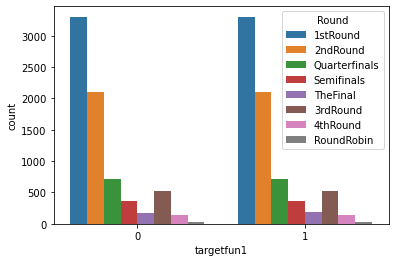

In [13]:
sns.countplot(x='targetfun1',hue='Round',data=df)

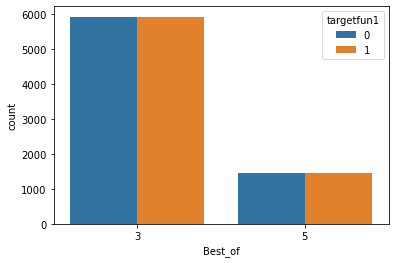

In [14]:
sns.countplot(x='Best_of',hue='targetfun1',data=df)

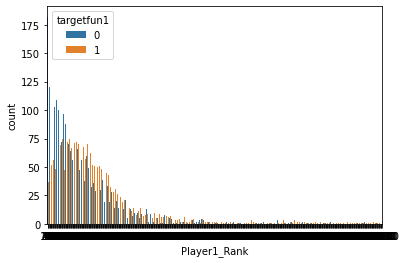

In [15]:
sns.countplot(x='Player1_Rank',hue='targetfun1',data=df)

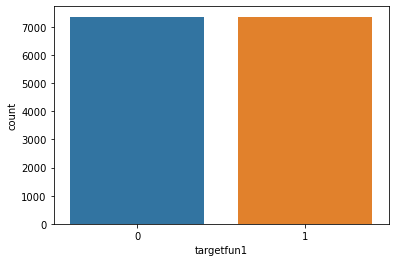

In [16]:
sns.countplot(x='targetfun1',data=df)

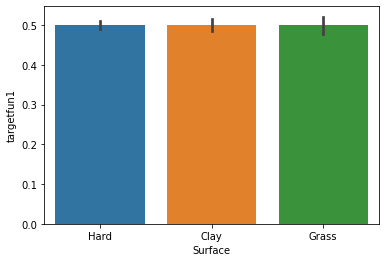

In [17]:
sns.barplot(x="Surface",y="targetfun1",data=df)

In [18]:
np.count_nonzero(df['targetfun1'])

7368

In [19]:
print(df['targetfun1'])
y=df['targetfun1']

0        1
1        0
2        1
3        0
4        1
        ..
14730    1
14731    0
14732    1
14733    0
14734    1
Name: targetfun1, Length: 14735, dtype: int64


In [20]:
dropping=['Tournament','Series','Court','Surface','Round','Winner','Player1','Player2']
for x in dropping:
    df.drop(x,axis=1,inplace=True)
print(df)

       ATP  Tournament_Int   Date  Series_Int  Court_Int  Surface_Int  \
0        1          1.2757  42737      2.9693     3.6494       4.4983   
1        1          1.2757  42737      2.9693     3.6494       4.4983   
2        1          1.2757  42737      2.9693     3.6494       4.4983   
3        1          1.2757  42737      2.9693     3.6494       4.4983   
4        1          1.2757  42737      2.9693     3.6494       4.4983   
...    ...             ...    ...         ...        ...          ...   
14730   65          1.7532  41223      2.7079     3.2579       4.4983   
14731   65          1.7532  41223      2.7079     3.2579       4.4983   
14732   65          1.7532  41224      2.7079     3.2579       4.4983   
14733   65          1.7532  41224      2.7079     3.2579       4.4983   
14734   65          1.7532  41225      2.7079     3.2579       4.4983   

       Round_Int  Best_of  Winner_Int  Player1_Int  Player2_Int  Player1_Rank  \
0         5.1257        3      6.7926     

In [21]:
x1=df[['Tournament_Int','Series_Int','Court_Int','Surface_Int','Round_Int','Best_of','Winner_Int','Player1_Int','Player2_Int']]
x2=df[['ATP','Date','Player1_Rank','Player2_Rank','Player1_Odds','Player2_Odds','Player1_Implied_Prob','Player1_Implied_Prob']]

In [22]:
print(x1)
print(x2)
print(y)

       Tournament_Int  Series_Int  Court_Int  Surface_Int  Round_Int  Best_of  \
0              1.2757      2.9693     3.6494       4.4983     5.1257        3   
1              1.2757      2.9693     3.6494       4.4983     5.1257        3   
2              1.2757      2.9693     3.6494       4.4983     5.1257        3   
3              1.2757      2.9693     3.6494       4.4983     5.1257        3   
4              1.2757      2.9693     3.6494       4.4983     5.1257        3   
...               ...         ...        ...          ...        ...      ...   
14730          1.7532      2.7079     3.2579       4.4983     5.9542        3   
14731          1.7532      2.7079     3.2579       4.4983     5.9542        3   
14732          1.7532      2.7079     3.2579       4.4983     5.2101        3   
14733          1.7532      2.7079     3.2579       4.4983     5.2101        3   
14734          1.7532      2.7079     3.2579       4.4983     5.3011        3   

       Winner_Int  Player1_

In [23]:
bestfeatures=SelectKBest(score_func=chi2,k=8)
fit=bestfeatures.fit_transform(x1,y)
cols=x1.columns.values[bestfeatures.get_support()]
print(cols)
scores=bestfeatures.scores_[bestfeatures.get_support()]
print(scores)
name_scores=list(zip(cols,scores))
print(name_scores)


['Tournament_Int' 'Series_Int' 'Surface_Int' 'Round_Int' 'Best_of'
 'Winner_Int' 'Player1_Int' 'Player2_Int']
[5.27384256e-04 3.25243667e-06 3.80413802e-05 8.56851882e-06
 5.37271612e-03 3.19679814e-05 1.35813256e-02 2.06900721e-04]
[('Tournament_Int', 0.0005273842564133971), ('Series_Int', 3.2524366711158603e-06), ('Surface_Int', 3.804138024732386e-05), ('Round_Int', 8.568518815181085e-06), ('Best_of', 0.005372716123228137), ('Winner_Int', 3.1967981420092994e-05), ('Player1_Int', 0.013581325585670843), ('Player2_Int', 0.00020690072145969352)]


In [24]:
bestfeatures1=SelectKBest(score_func=f_classif,k=8)
fit=bestfeatures1.fit_transform(x2,y)
cols1=x2.columns.values[bestfeatures1.get_support()]
scores1=bestfeatures1.scores_[bestfeatures1.get_support()]
name_scores1=list(zip(cols1,scores1))
print(name_scores1)


[('ATP', 0.001674127190759714), ('Date', 0.00011613871377847595), ('Player1_Rank', 320.49985975686064), ('Player2_Rank', 480.0552271481952), ('Player1_Odds', 1903.545056128768), ('Player2_Odds', 2069.9113820186717), ('Player1_Implied_Prob', 4737.081990699774), ('Player1_Implied_Prob', 4737.081990699774)]


In [25]:
l5=['Court_Int','Series_Int','Round_Int','ATP','Date']
for x in l5:
         df.drop(x,axis=1,inplace=True)

In [26]:
print(df)

       Tournament_Int  Surface_Int  Best_of  Winner_Int  Player1_Int  \
0              1.2757       4.4983        3      6.7926       6.7633   
1              1.2757       4.4983        3      6.9297       6.9297   
2              1.2757       4.4983        3      6.3881       6.5792   
3              1.2757       4.4983        3      6.8384       6.8384   
4              1.2757       4.4983        3      6.5157       6.7032   
...               ...          ...      ...         ...          ...   
14730          1.7532       4.4983        3      6.0310       6.9997   
14731          1.7532       4.4983        3      6.3881       6.3881   
14732          1.7532       4.4983        3      6.9457       6.0310   
14733          1.7532       4.4983        3      6.9997       6.9997   
14734          1.7532       4.4983        3      6.9457       6.9997   

       Player2_Int  Player1_Rank  Player2_Rank  Player1_Odds  Player2_Odds  \
0           6.7926         160.0          79.0          3

In [41]:
scaling=StandardScaler()
x=df.drop('targetfun1',axis=1)
scaling.fit_transform(x);
y=df['targetfun1']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)
from sklearn.linear_model import LogisticRegression
lgmodel=LogisticRegression()
lgmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
predictions=lgmodel.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [37]:
print(y_test)
print(predictions[0])

14195    0
2750     1
2646     1
1783     0
4001     0
        ..
244      1
3045     0
2652     1
8830     1
4195     0
Name: targetfun1, Length: 4421, dtype: int64
1


In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7000678579506899

In [ ]:
print(df)

In [53]:
seed=7
kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
cart=DecisionTreeClassifier()
num_trees=100
model=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=None)
r=model_selection.cross_val_score(model,x,y,cv=kfold)
print(r.mean())

0.9594844238352765


In [46]:
model1=RandomForestClassifier(n_estimators=num_trees,max_features=4,random_state=7)
r1=model_selection.cross_val_score(model,x,y,cv=kfold)
print(r1.mean())

0.9596883661676804


In [47]:
model1.fit(X_train,y_train)
rf_predictions=model1.predict(X_test)

In [48]:
rf_probs=model1.predict_proba(X_test)[:,1]

In [49]:
from sklearn.metrics import roc_auc_score
roc_value=roc_auc_score(y_test,rf_probs)

In [50]:
print(roc_value)

0.9738919934887311


In [51]:
def reports(ytrue,predicted):
    print("Accuracy : {}".format(metrics.accuracy_score(ytrue,predicted)))
    print("Precision : {}".format(metrics.precision_score(ytrue,predicted)))
    print("Recall : {}".format(metrics.recall_score(ytrue,predicted)))
    print("F1_score : {}".format(metrics.f1_score(ytrue,predicted)))
    ##print("Logloss : {}".format(metrics.log_loss(ytrue,predicted)))
    print("AUC : {}".format(metrics.roc_auc_score(ytrue,predicted)))

In [52]:
predtest=model1.predict(X_test)
predtrain=model1.predict(X_train)
print("########TRAIN REPORT#########")
reports(y_train,predtrain)
print("########TEST REPORT#########")
reports(y_test,predtest)

########TRAIN REPORT#########
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1_score : 1.0
AUC : 1.0
########TEST REPORT#########
Accuracy : 0.9156299479755712
Precision : 0.913336326897171
Recall : 0.9186991869918699
F1_score : 0.9160099076784507
AUC : 0.9156250805824777


In [ ]:
from joblib import dump, load
dump(model1, 'ankit.joblib')

In [ ]:
print(X_train)

In [ ]:
rf_predictions